<a href="https://colab.research.google.com/github/123prashanth123/Fault-Detection-System/blob/Colabs/Patch%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as r
from sklearn.feature_extraction.image import extract_patches_2d

# Manual

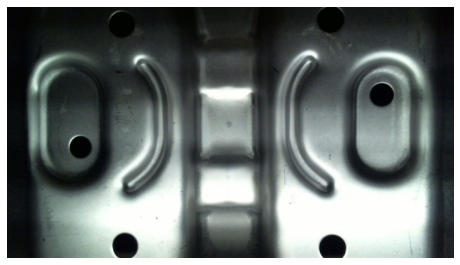

In [ ]:
try:
    # names = [name for name in os.listdir("/content") if name[-3:] == "png"]
    # idx = r.randint(0, len(names)-1)
    # image = cv2.cvtColor(cv2.imread("/content/" + names[idx], cv2.IMREAD_COLOR), code=cv2.COLOR_BGR2RGB)
    name = "M7.jpg"
    # image = cv2.resize(src=cv2.cvtColor(cv2.imread("/content/" + name, cv2.IMREAD_COLOR), code=cv2.COLOR_BGR2RGB), dsize=(6*125, 6*125), interpolation=cv2.INTER_AREA)
    image = cv2.resize(src=cv2.cvtColor(cv2.imread("/content/" + name, cv2.IMREAD_COLOR), code=cv2.COLOR_BGR2RGB), dsize=(640, 360), interpolation=cv2.INTER_AREA)
    plt.figure(figsize=(8, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
except Exception as e:
    print("Error Reading File")
finally:
    pass

In [ ]:
h, w, _ = image.shape
patch_h, patch_w = 96, 96

patches = []

if h % patch_h == 0:
    num_cols = int(h/patch_h)
else:
    num_cols = int(h/patch_h) + 1

if w % patch_w == 0:
    num_rows = int(w/patch_w)
else:
    num_rows = int(w/patch_w) + 1

for i in range(0, h, patch_h):
    for j in range(0, w, patch_w):
        patches.append([i, patch_h+i, j, patch_w+j])

patches = np.array(patches).reshape(num_cols, num_rows, 4)
print(" ----------------------------------- ")
print(patches.shape)
print(" ----------------------------------- ")
print(patches)

image = cv2.resize(src=image, dsize=(num_rows*patch_w, num_cols*patch_h), interpolation=cv2.INTER_AREA)

 ----------------------------------- 
(4, 7, 4)
 ----------------------------------- 
[[[  0  96   0  96]
  [  0  96  96 192]
  [  0  96 192 288]
  [  0  96 288 384]
  [  0  96 384 480]
  [  0  96 480 576]
  [  0  96 576 672]]

 [[ 96 192   0  96]
  [ 96 192  96 192]
  [ 96 192 192 288]
  [ 96 192 288 384]
  [ 96 192 384 480]
  [ 96 192 480 576]
  [ 96 192 576 672]]

 [[192 288   0  96]
  [192 288  96 192]
  [192 288 192 288]
  [192 288 288 384]
  [192 288 384 480]
  [192 288 480 576]
  [192 288 576 672]]

 [[288 384   0  96]
  [288 384  96 192]
  [288 384 192 288]
  [288 384 288 384]
  [288 384 384 480]
  [288 384 480 576]
  [288 384 576 672]]]


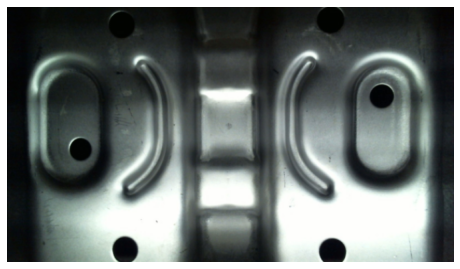

In [ ]:
n_image = np.zeros((num_cols*patch_h, num_rows*patch_w, 3)).astype("uint8")

for i in range(num_cols):
    for j in range(num_rows):
        n_image[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w, :] = image[patches[i][j][0]:patches[i][j][1], patches[i][j][2]:patches[i][j][3], :]

plt.figure(figsize=(8, 5))
plt.imshow(n_image)
plt.axis("off")
plt.show()

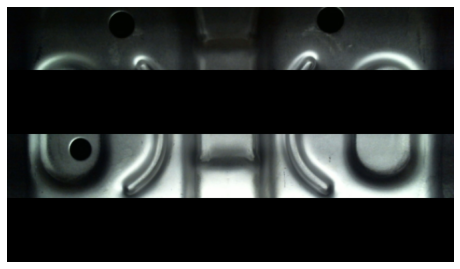

In [ ]:
n_image = np.zeros((num_cols*patch_h, num_rows*patch_w, 3)).astype("uint8")

for i in range(num_cols):
    for j in range(num_rows):
        if i % 2 == 0:
            n_image[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w, :] = image[patches[i][j][0]:patches[i][j][1], patches[i][j][2]:patches[i][j][3], :]

plt.figure(figsize=(8, 5))
plt.imshow(n_image)
plt.axis("off")
plt.show()

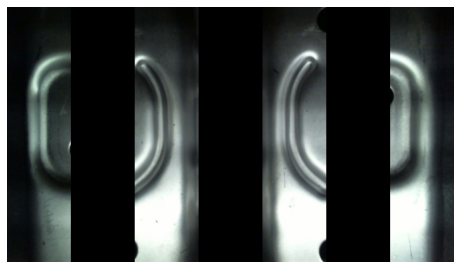

In [ ]:
n_image = np.zeros((num_cols*patch_h, num_rows*patch_w, 3)).astype("uint8")

for i in range(num_cols):
    for j in range(num_rows):
        if j % 2 == 0:
            n_image[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w, :] = image[patches[i][j][0]:patches[i][j][1], patches[i][j][2]:patches[i][j][3], :]

plt.figure(figsize=(8, 5))
plt.imshow(n_image)
plt.axis("off")
plt.show()

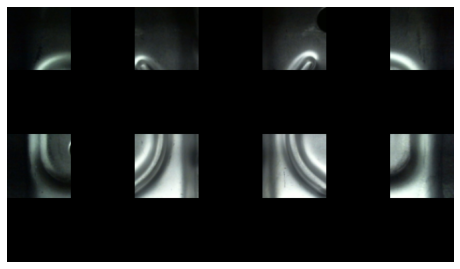

In [ ]:
n_image = np.zeros((num_cols*patch_h, num_rows*patch_w, 3)).astype("uint8")

for i in range(num_cols):
    for j in range(num_rows):
        if i % 2 == 0  and j % 2 == 0:
            n_image[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w, :] = image[patches[i][j][0]:patches[i][j][1], patches[i][j][2]:patches[i][j][3], :]

plt.figure(figsize=(8, 5))
plt.imshow(n_image)
plt.axis("off")
plt.show()

# Sklearn

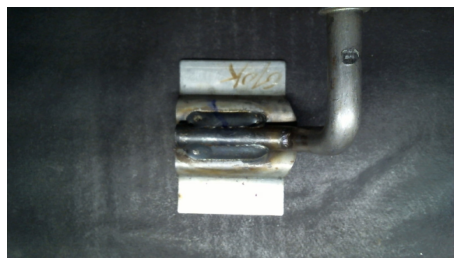

(144425, 96, 96, 3)
(48141, 96, 96, 3)


In [ ]:
try:
    name = "M6.jpg"
    image = cv2.resize(src=cv2.cvtColor(cv2.imread("/content/" + name, cv2.IMREAD_COLOR), code=cv2.COLOR_BGR2RGB), dsize=(640, 360), interpolation=cv2.INTER_AREA)
    plt.figure(figsize=(8, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
except Exception as e:
    print("Error Reading File")
finally:
    pass

h, w, c = image.shape
patch_h, patch_w = 96, 96
patches = extract_patches_2d(image, (patch_h, patch_w))
print(patches.shape)
patches = patches[:int(patches.shape[0]/c), :, :, :]
print(patches.shape)

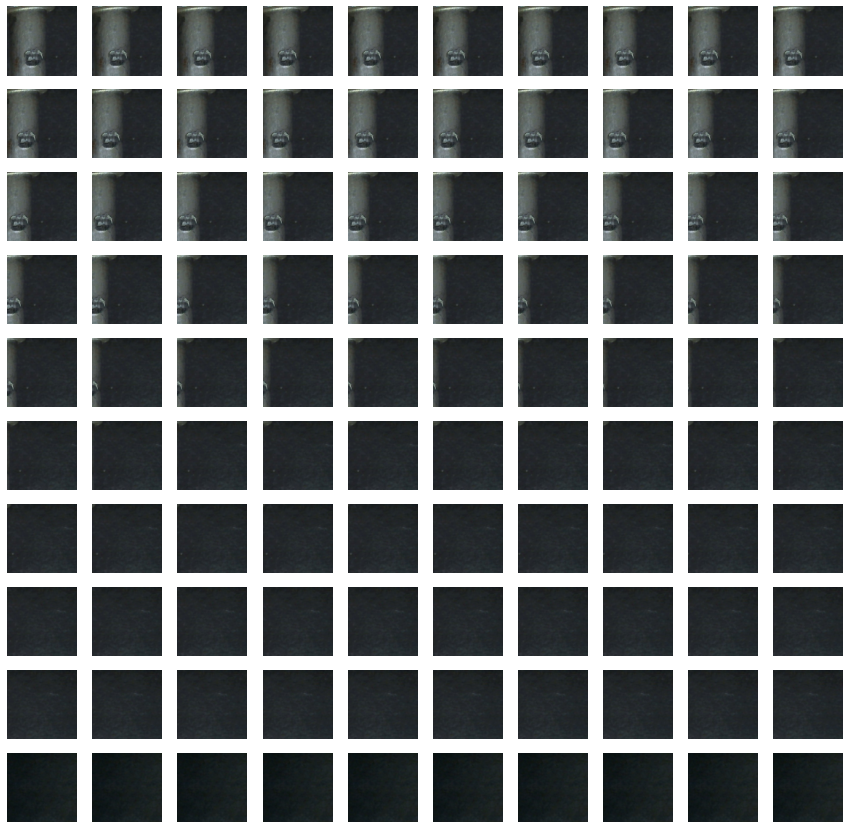

In [ ]:
offset = 1000

plt.figure(figsize=(15, 15))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(patches[offset:offset+100][i])
    plt.axis("off")
plt.show()

In [ ]:
new_patches = np.array([patches[i] for i in range(0, patches.shape[0], patch_h)])
# new_patches = np.array([new_patches[i] for i in range(0, new_patches.shape[0], patch_h)])
print(new_patches.shape)

(502, 96, 96, 3)


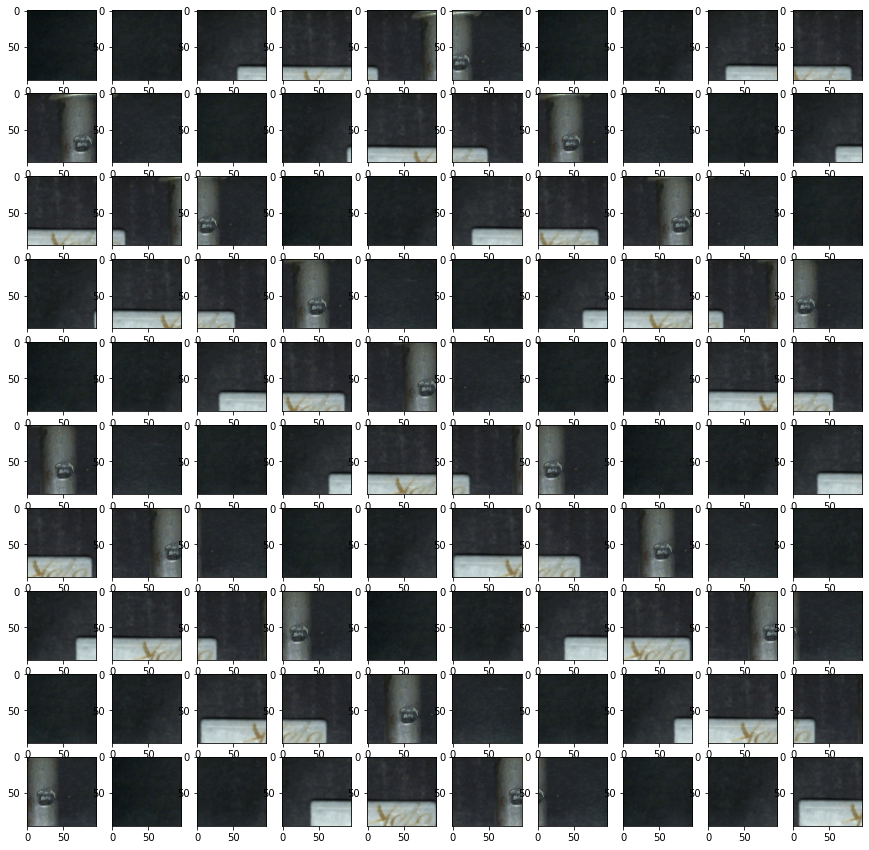

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(new_patches[i])
plt.show()